## Линейная регрессия с 1 predictor
#### Регрессионный анализ

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sma
from statsmodels.stats.anova import anova_lm
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../resources/states.csv")
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Диаграмма рассеивания

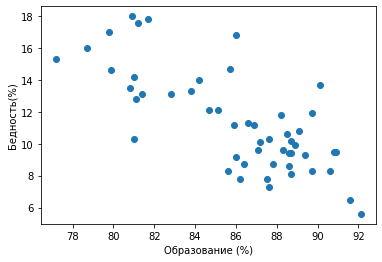

In [3]:
x=df["hs_grad"]
y=df["poverty"] #зависимая переменная
plt.scatter(x,y)

# подписи к осям
plt.xlabel("Образование (%)")
plt.ylabel("Бедность(%)");

Характер взаимосвязи 2х переменных линейный с отрицательным значением
Это позволяет применить регрессионный анализ для исследования взаимосвязи

In [4]:
df_filter = df.drop(
    ["state","metro_res","white", "female_house"], axis=1)
df_filter.head()

,hs_grad,poverty
0,79.9,14.6
1,90.6,8.3
2,83.8,13.3
3,80.9,18.0
4,81.1,12.8


In [5]:
# Описательная статистика
df_filter.describe()

,hs_grad,poverty
count,51.000000,51.000000
mean,86.011765,11.349020
std,3.725998,3.099185
min,77.200000,5.600000
25%,83.300000,9.250000
50%,86.900000,10.600000
75%,88.700000,13.400000
max,92.100000,18.000000


### Корелляция

In [6]:
slope, intercept, r_value, p_value, std_err=linregress(x,y)
linregress(x,y)

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)

Корелляция rvalue=-0.7468582531582505

корреляция отрицательная,поэтому коэффициент корреляции между переменными близко к -1

b1 slope=-0.6212167177940106 (угловой коэффицент) (показывает изменение зависимой переменнной (уровень бедности) при единичном изменении независимой переменной (образование)

b0 intercept=64.78096577010209 

p-уровень значимости pvalue=3.10882981031841e-10

Стандартная ошибка параметра b1 регрессионной модели stderr=0.0790164710017928

#### Регрессионный анализ позволит проверить гипотезу о взаимосвязи
1. Построение регрессионной модели, которая объясняет взаимосвязь 2х переменных (регрессионная прямая)- насколько хорошо модель объясняет поведение зависимой переменной (расчет коэффициентов регрессии b0, b1)
2. Рассчет коэффициента детерминации - какой процент дисперсии объясняется регрессионной моделью 



1. Взаимосвязь оказалась отрицательной (уравнение регрессии y=b0+b1*x)
2. 56% дисперсии одной переменной обусловлено взаимосвязью с другой переменной
3. -0.62 ожидание изменения уровня бедности при изменении единицы уровня образования

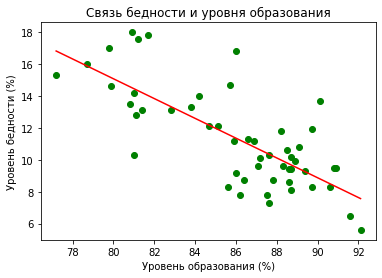

In [7]:
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x,y,'go') #диаграмма рассеивания
plt.plot(x1,y1,'-r') #регрессионная прямая
plt.title("Связь бедности и уровня образования")
plt.xlabel("Уровень образования (%)")
plt.ylabel("Уровень бедности (%)");

In [8]:
m1 = ols('poverty ~ hs_grad', data=df)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           3.11e-10
Time:                        13:00:16   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

Стандартная ошибка параметра b0 регрессионной модели std err=0.079

Коэффициент детерминации R-squared=0.558 ( ~56% изменчивости зависимой переменной объясняется построенной моделью)

~56% изменчивости зависимой переменной обуславливается независимой переменной. А моделью дисперсия зависимой переменной объясняется. 

Коэффициент детерминации - R^2 - показатель степени влияния одной переменной на другую. Из его значения "вытекает" расположение точек на регрессионной прямой. Ближе к 0 - точки не лежат на прямой. Ближе к 1 - лежат на прямой.

Коэффициент корреляции напрямую зависит от R^2, т.к. является квадратным корнем от этого R^2. Т.е. +-r.
-r или +r зависит от силы взаимосвязи корреляции, т.е. если взаимосвязь положительная, то и r положительный.



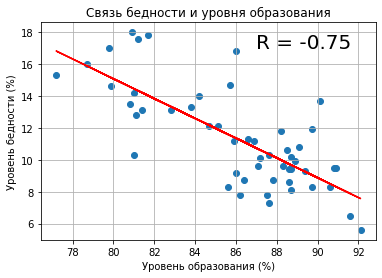

In [9]:
b0 = linregress(df['hs_grad'], df['poverty']).intercept
b1 = linregress(df['hs_grad'], df['poverty']).slope
y = b0 + b1*df['hs_grad']

plt.scatter(df['hs_grad'], df['poverty'])# scatter plot
plt.text(x=87,y=17,s='R = -0.75', fontsize=20) # text of R value

plt.plot(df['hs_grad'], y, color='red') # regression line

plt.grid()# сетка

plt.xlabel("Уровень образования (%)")
plt.ylabel("Уровень бедности (%)")
plt.title("Связь бедности и уровня образования");

### Регрессионный анализ с несколькими переменными

In [10]:
result = ols(formula="poverty ~ metro_res + white + hs_grad + female_house", data=df).fit()

result.params

Intercept       66.476525
metro_res       -0.056323
white           -0.048144
hs_grad         -0.554713
female_house     0.050543
dtype: float64

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           8.88e-10
Time:                        13:00:16   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

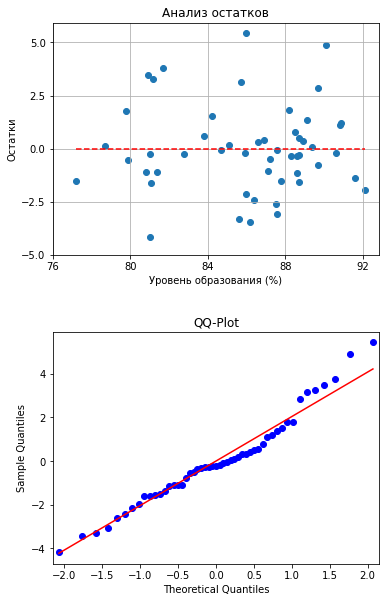

In [13]:
intercept, slope = ols(formula="poverty ~ hs_grad", data=df).fit().params
X = df['hs_grad']
Y = df['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Уровень образования (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)

Text(0, 0.5, 'Остатки')

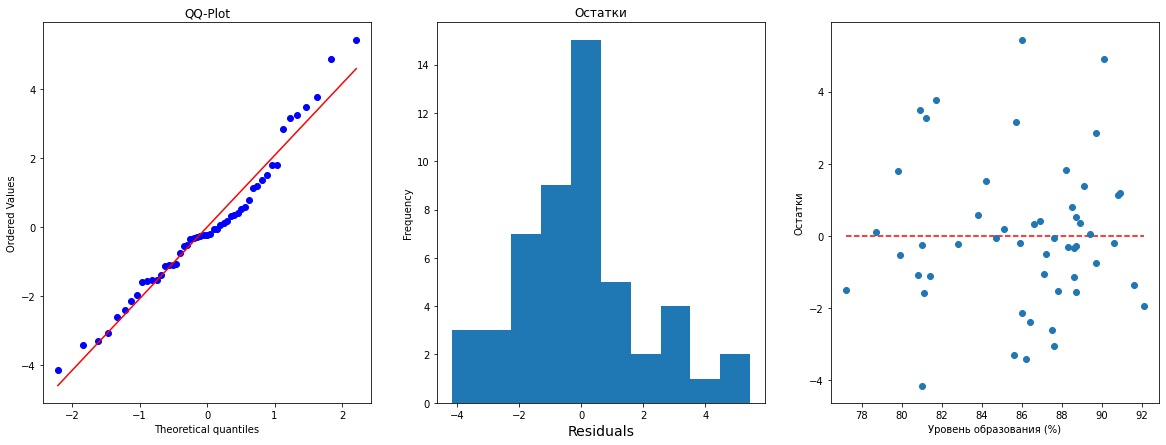

In [28]:
import scipy
plt.figure(figsize=(20,7))
plt.subplot(131)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.title("QQ-Plot")

plt.subplot(132)
(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.title("Остатки")

plt.subplot(133)
plt.plot(df['hs_grad'], fitted.resid, 'o')
plt.hlines(np.mean(fitted.resid), df['hs_grad'].min(), df['hs_grad'].max(), linestyle='--', colors='red')
plt.xlabel("Уровень образования (%)")
plt.ylabel("Остатки")